In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Text(0.5, 0, 'X')

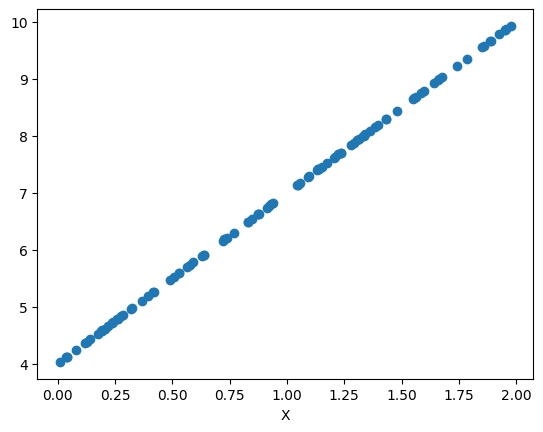

In [2]:
# Generar datos aleatorios
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X

# graficar
plt.scatter(X, y)
plt.xlabel('X')

In [3]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [4]:
# Evaluar los modelos
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'MSE: {mean_squared_error(y, y_pred)}')
print(f'MAE: {np.mean(np.abs(y - y_pred))}')
print(f'R2: {r2_score(y, y_pred)}')

print(f'correlation: {np.corrcoef(y.T, y_pred.T)[0, 1]}')


RMSE: 1.7696829641852286e-15
MSE: 3.131777793727417e-30
MAE: 1.7141843500212416e-15
R2: 1.0
correlation: 1.0


Agregamos solo un outlier

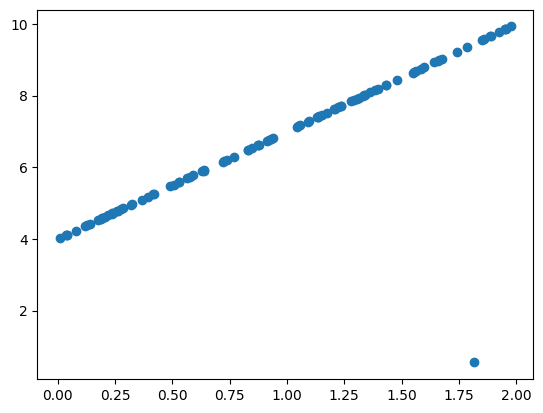

In [5]:
def agregar_outliers(X, y, N, x_range=(1, 3), y_range=(0, 10)):
    """
    Agrega N outliers aleatorios a los datos X e y.

    Parameters:
    X (numpy.ndarray): Datos originales de X.
    y (numpy.ndarray): Datos originales de y.
    N (int): Número de outliers a agregar.
    x_range (tuple): Rango de valores para los outliers en X.
    y_range (tuple): Rango de valores para los outliers en y.

    Returns:
    numpy.ndarray: Nuevos datos de X con outliers.
    numpy.ndarray: Nuevos datos de y con outliers.
    """
    np.random.seed(40)  # Para reproducibilidad
    X_outliers = np.random.uniform(x_range[0], x_range[1], size=(N, 1))
    y_outliers = np.random.uniform(y_range[0], y_range[1], size=(N, 1))

    X_new = np.vstack((X, X_outliers))
    y_new = np.vstack((y, y_outliers))

    return X_new, y_new

# Ejemplo de uso
X_outlier, y_outlier = agregar_outliers(X, y, 1)

# Graficar
plt.scatter(X_outlier, y_outlier)


In [6]:
model = LinearRegression()
model.fit(X_outlier, y_outlier)
y_pred = model.predict(X_outlier)

In [7]:
# Evaluar los modelos
print(f'RMSE: {np.sqrt(mean_squared_error(y_outlier, y_pred))}')
print(f'MSE: {mean_squared_error(y_outlier, y_pred)}')
print(f'MAE: {np.mean(np.abs(y_outlier - y_pred))}')
print(f'R2: {r2_score(y_outlier, y_pred)}')

print(f'correlation: {np.corrcoef(y_outlier.T, y_pred.T)[0, 1]}')


RMSE: 0.8706883427976283
MSE: 0.7580981902836803
MAE: 0.21332772605470293
R2: 0.7736757107940225
correlation: 0.8795883757724529
